This notebook is used to make the global (ASD, DHD, DSC) errors for the optimised TSFFD configuration. For the purposes of Nov Update meeting slides.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
## All 30 Cases

all_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '18', '21', '24', '27', '28', '29', '30',
             '32', '10', '19', '20', '23', '26', '31', '25', '34']
all_cases = [f"CT-CRT-{case}" for case in all_cases]

ebr=['EBR-01', 'EBR-02']

all_cases=all_cases+ebr

In [11]:
f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT-{case_ind}' for case_ind in f20_cases]
ebr=['EBR-01', 'EBR-02']
f20_cases = f20_cases + ebr

In [3]:
basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"

In [4]:
path=f"{basePath}/CT-CRT-01/MT-HiRes/SW-0.0-BE-1e-9"

In [5]:
np.loadtxt(f"{path}/normal-distance.txt")

array(0.45316957)

In [6]:
np.loadtxt(f"{path}/hausdorff-distance.txt")

array(2.60040436)

In [10]:
np.loadtxt(f"{path}/dice-PVeinsCropped.txt")

array(0.95380437)

In [33]:
ASD = np.zeros((30,))
DHD = np.zeros((30,))
DSC = np.zeros((30,))

for i in range(0, len(all_cases)):
    
    case = all_cases[i]
    
    if case in f20_cases:
        path=f"{basePath}/{all_cases[i]}/MT-HiRes-TDownsampled/SW-0.0-BE-1e-9"
    else:
        path=f"{basePath}/{all_cases[i]}/MT-HiRes/SW-0.0-BE-1e-9"
    
    ASD[i] = np.loadtxt(f"{path}/normal-distance.txt")
    DHD[i] = np.loadtxt(f"{path}/hausdorff-distance.txt")
    
    if case in ["CT-CRT-31", "CT-CRT-34"]:
        DSC[i] = np.loadtxt(f"{path}/dice-LA_chamber.txt")*100
    else:
        DSC[i] = np.loadtxt(f"{path}/dice-PVeinsCropped.txt")*100

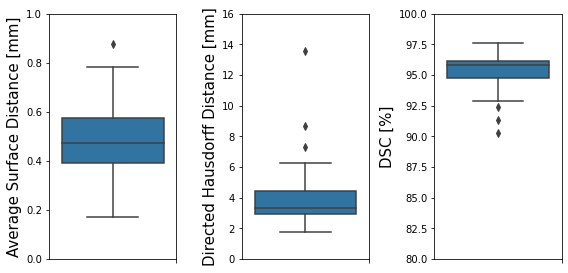

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,4), facecolor='white')

# data=[ASD, rms_max]
sns.boxplot(ax=ax1, data=ASD, orient='v')
sns.boxplot(ax=ax2, data=DHD, orient='v')
sns.boxplot(ax=ax3, data=DSC, orient='v')

ax1.set_ylabel("Average Surface Distance [mm]", fontsize=15)
ax2.set_ylabel("Directed Hausdorff Distance [mm]", fontsize=15)
ax3.set_ylabel("DSC [%]", fontsize=15)


ax1.set_ylim(0, 1.0)
ax2.set_ylim(0, 16)
ax3.set_ylim(80, 100)

plt.tight_layout()

ax1.set_xticks([0.5])
ax2.set_xticks([0.5])
ax3.set_xticks([0.5])

# plt.ylabel("LA vertex RMS Error [mm]", fontsize=20)
# plt.xticks(np.arange(2), ['t=40%', 'Max'], fontsize=15)
# plt.yticks(np.arange(0.0, 4.5, 0.5), fontsize=15)
# plt.ylim(0.0, 4.0)

plt.savefig("/home/csi20local/Dropbox/phd/Documents/HC_analysis/tsffd_opt_boxplots.png", dpi=200)